# Importing important libraries

In [17]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
#used for statistical reporting 
import matplotlib.pyplot as plt 
import math 
import os 
%matplotlib inline 

In [18]:
cwd = os.getcwd()
#print (cwd)
data=pd.read_csv('train_loan.csv')
#data.columns = ["SL","SW","PL","PW","cat"]
#print (data)
Ddata=pd.DataFrame(data)
print (Ddata)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
5    LP001011    Male     Yes          2      Graduate           Yes   
6    LP001013    Male     Yes          0  Not Graduate            No   
7    LP001014    Male     Yes         3+      Graduate            No   
8    LP001018    Male     Yes          2      Graduate            No   
9    LP001020    Male     Yes          1      Graduate            No   
10   LP001024    Male     Yes          2      Graduate            No   
11   LP001027    Male     Yes          2      Graduate           NaN   
12   LP001028    Male     Yes          2      Graduate          

# Preliminary data Analysis

In [19]:
Ddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


# 1. Analysing Categorical parameters w.r.t Final Loan Status

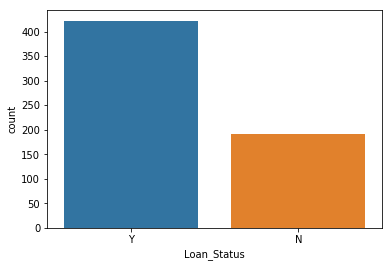

In [120]:
sns.countplot(x="Loan_Status",data=Ddata)
#Single categorical parameter and its count
#Inference: Relatively the number of loans offered>Loans denied

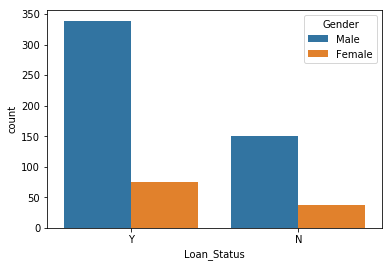

In [87]:
sns.countplot(x="Loan_Status",hue="Gender",data=Ddata)
#within the Loan Status, bifurcation of Gender
#Inference:
#1.No of Male > Female in the Loans Granted Case
#2.Overall Male applicants > Female Applicants

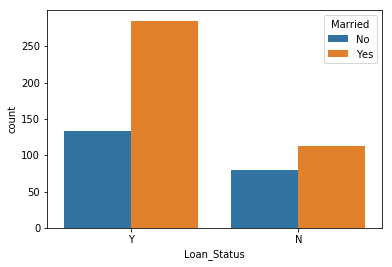

In [7]:
sns.countplot(x="Loan_Status",hue="Married",data=Ddata)
#within the Loan Status, bifurcation of Married & Unmarried
#Inference:
#1.No of Married applicants > Unmarried applicants in the loans granted Case
#2.No of Married applicants > Unmarried applicants

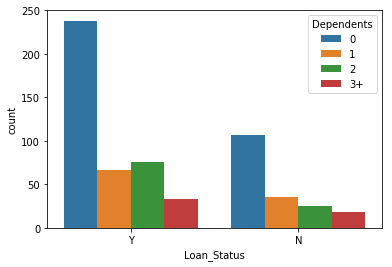

In [8]:
sns.countplot(x="Loan_Status",hue="Dependents",data=Ddata)
#within the Loan Status, bifurcation on the basis of no of Dependents
#Inference:
#1.No of 0 dependents > 1,2,3+ dependents in the loans granted case
# Overall applicants with 0 dependents > applicants with 1,2,3+ dependents

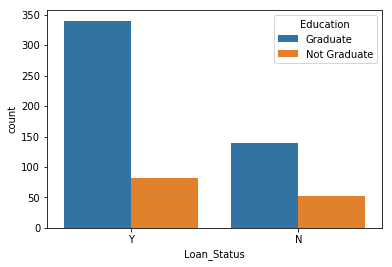

In [9]:
sns.countplot(x="Loan_Status",hue="Education",data=Ddata)
#within the Loan Status, bifurcation of Education
#Inference:
#1.No of Graduate > Not Graduates in the loans granted Case
#2.No of Graduates > Not Graduates who applied for loan

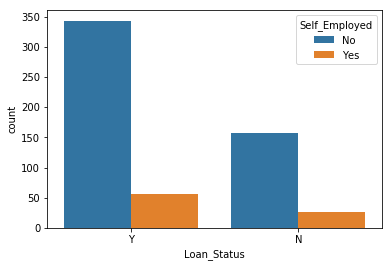

In [10]:
sns.countplot(x="Loan_Status",hue="Self_Employed",data=Ddata)
#within the Loan Status Cv, bifurcation of Self-Employed/Employed
#Inference:
#1.No of Employed > Self Employed in the loans granted case
#2.No of Employed > Self employed among those who applied for loan

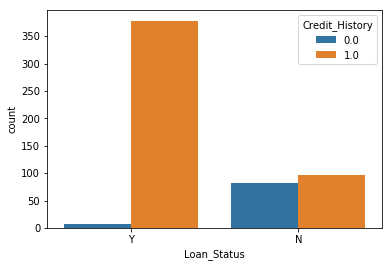

In [13]:
sns.countplot(x="Loan_Status",hue="Credit_History",data=Ddata)
#within the Loan Status Cv, bifurcation of Credit History or No Credit History
#Inference:
#1.No of people with Credit.history > people with no credit history in the loans granted case
#==> People who have applied for prior credit proportional to chances of getting new loan
#2.No of aaplicants with Credit History are more in count wrt No Credit History

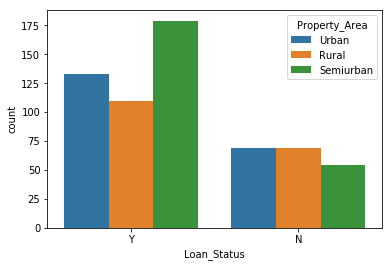

In [14]:
sns.countplot(x="Loan_Status",hue="Property_Area",data=Ddata)
#within the Loan Status Cv, bifurcation of Property Area
#Inference:
#1.No of Semi Urban people > Urban > Rural applicants in the loans granted Case
#2.No of Semi Urban People> Urban People> Rural People

# 2. Analysing Continious Variables w.r.t to Loan_Status

In [21]:
df=Ddata

average Applicant income for Yes case= 5384.068720379147
average Applicant income for No case= 5446.078125


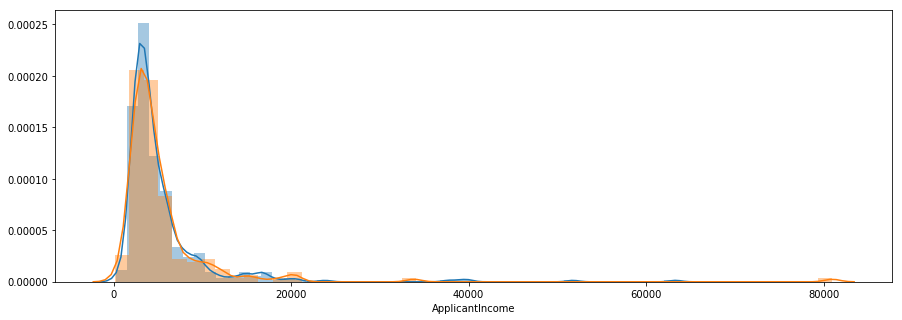

In [117]:
dfyes=pd.DataFrame(df[df.Loan_Status=="Y"])
dfNo=pd.DataFrame(df[df.Loan_Status=="N"])
print ("average Applicant income for Yes case= "+str((dfyes.ApplicantIncome.sum())/(len(dfyes.index))))
print ("average Applicant income for No case= "+str((dfNo.ApplicantIncome.sum())/(len(dfNo.index))))
fig = plt.figure(figsize=(15,5))
fig.add_subplot(1,1,1)
sns.distplot(dfyes.ApplicantIncome,hist=True,rug=False)
sns.distplot(dfNo.ApplicantIncome,hist=True,rug=False)
#Inferences
#Average Applicant income for loan passed < Average Applicant income for loan denied

average Co-Applicant income for Yes case= 1504.516398077346
average Co-Applicant income for No case= 1877.8072916666667


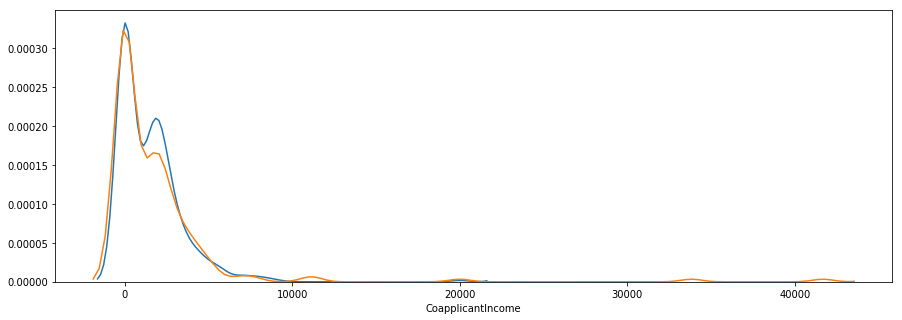

In [118]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(1,1,1)
sns.distplot(dfyes.CoapplicantIncome,hist=False,rug=False)
sns.distplot(dfNo.CoapplicantIncome,hist=False,rug=False)
print ("average Co-Applicant income for Yes case= "+str((dfyes.CoapplicantIncome.sum())/(len(dfyes.index))))
print ("average Co-Applicant income for No case= "+str((dfNo.CoapplicantIncome.sum())/(len(dfNo.index))))
#Inferences
#Average Co-Applicant income for loan passed < Average Co-Applicant income for loan denied

average LoanAmount for Yes case= 140.53317535545023
average LoanAmount for No case= 142.55729166666666


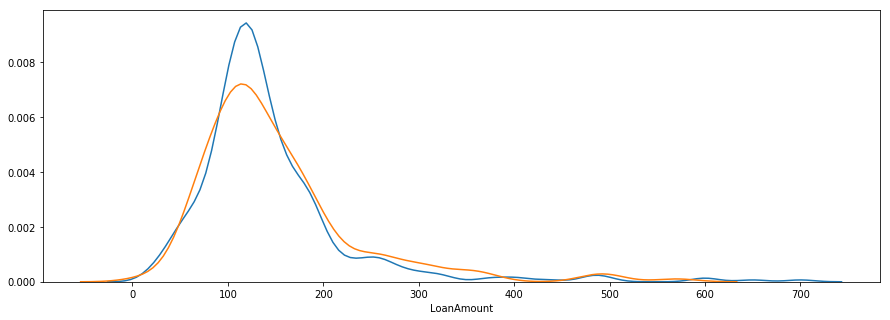

In [119]:
#dfyes.LoanAmount.plot.hist()
#dfNo.LoanAmount.plot.hist()
fig = plt.figure(figsize=(15,5))
fig.add_subplot(1,1,1)
sns.distplot(dfyes.LoanAmount,hist=False,rug=False)
sns.distplot(dfNo.LoanAmount,hist=False,rug=False)
print ("average LoanAmount for Yes case= "+str((dfyes.LoanAmount.sum())/(len(dfyes.index))))
print ("average LoanAmount for No case= "+str((dfNo.LoanAmount.sum())/(len(dfNo.index))))
#Inference
#Approximately the average loan amount is almost same for both Loan granted and loan denied.

average Loan_Amount_Term for Yes case= 334.60663507109007
average Loan_Amount_Term for No case= 333.3125


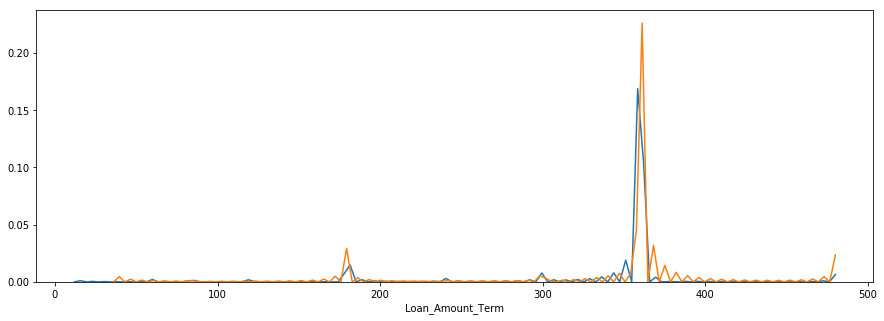

In [120]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(1,1,1)
sns.distplot(dfyes.Loan_Amount_Term,hist=False,rug=False)
sns.distplot(dfNo.Loan_Amount_Term,hist=False,rug=False)
print ("average Loan_Amount_Term for Yes case= "+str((dfyes.Loan_Amount_Term.sum())/(len(dfyes.index))))
print ("average Loan_Amount_Term for No case= "+str((dfNo.Loan_Amount_Term.sum())/(len(dfNo.index))))
# The diagram shows the distribution of loan amount time for Loan granted and denied

# 3. Analysing Relationship b/w Continious variables

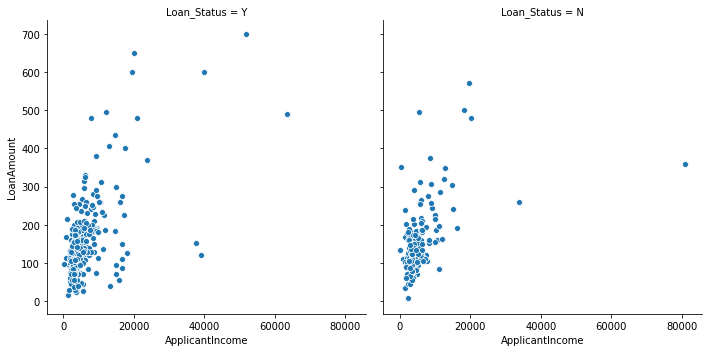

In [133]:
#Ddata.plot('ApplicantIncome','LoanAmount',kind='line')
#plt.scatter(Ddata.ApplicantIncome,Ddata.LoanAmount)# Relevant Rn<==not so good
sns.relplot(x="ApplicantIncome",y="LoanAmount",col="Loan_Status",data=Ddata)

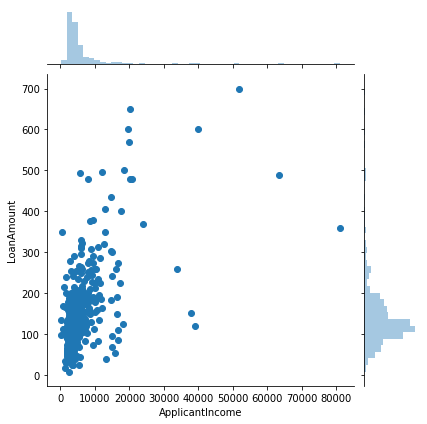

In [132]:
sns.jointplot(x="ApplicantIncome",y="LoanAmount",data=Ddata)

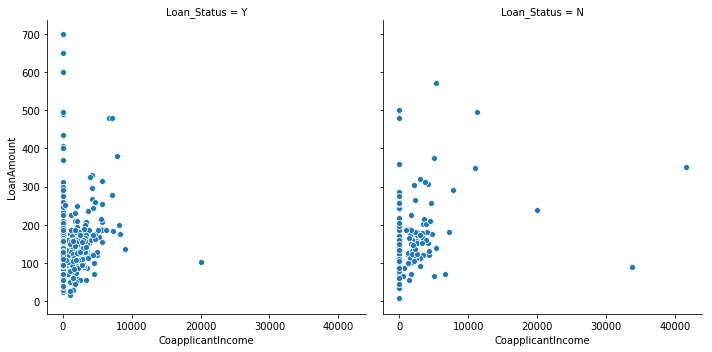

In [136]:
#plt.scatter(Ddata.LoanAmount,Ddata.CoapplicantIncome)# Relevant Rn
sns.relplot(x="CoapplicantIncome",y="LoanAmount",col="Loan_Status",data=Ddata)

# 4. Relationship b/w 2 Categorical variables

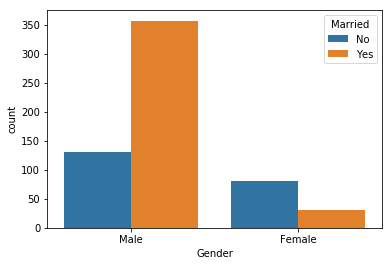

In [138]:
sns.countplot(x="Gender",hue="Married",data=Ddata)
#Inference
#1.Married applicant > Unmarried applicants
#2.Majority of Male applicants are married 
#3.Majority of Female applicants are Unmarried

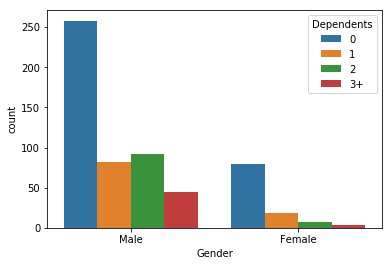

In [48]:
sns.countplot(x="Gender",hue="Dependents",data=Ddata)
#Inference
#1.Majority Male & Female applicants have 0 dependents

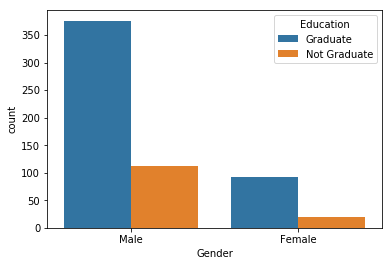

In [49]:
sns.countplot(x="Gender",hue="Education",data=Ddata)
#Inference
#1.Majority of applicants are Graduate
#2.Majority of Male and Female Applicants are Graduates

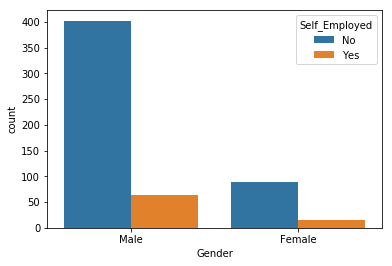

In [50]:
sns.countplot(x="Gender",hue="Self_Employed",data=Ddata)
#Inference
#1.Majority of Applicants are Employed and not self employed

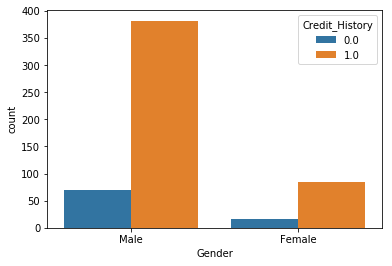

In [51]:
sns.countplot(x="Gender",hue="Credit_History",data=Ddata)
#Inference
#1.Majority of Applicants have previous Credit History

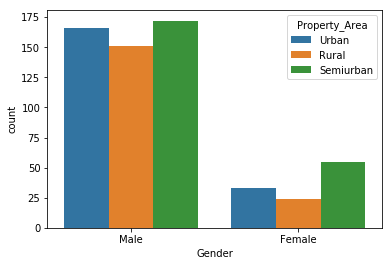

In [52]:
sns.countplot(x="Gender",hue="Property_Area",data=Ddata)
#Inference
#1.Majority of Applicants are from Semi Urban > Urban > Rural

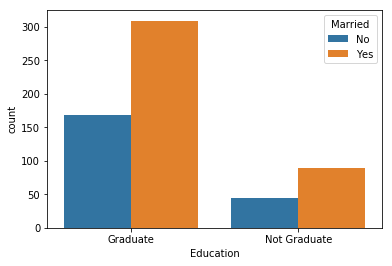

In [56]:
sns.countplot(x="Education",hue="Married",data=Ddata)

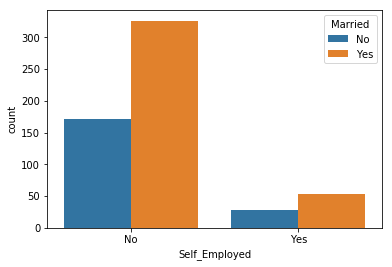

In [57]:
sns.countplot(x="Self_Employed",hue="Married",data=Ddata)

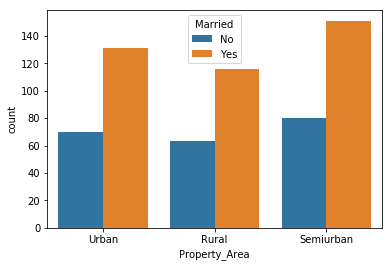

In [58]:
sns.countplot(x="Property_Area",hue="Married",data=Ddata)

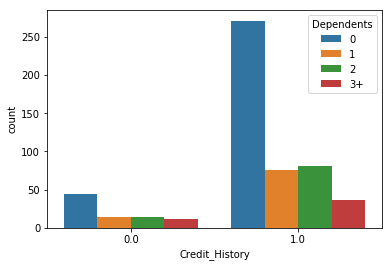

In [59]:
sns.countplot(x="Credit_History",hue="Dependents",data=Ddata)

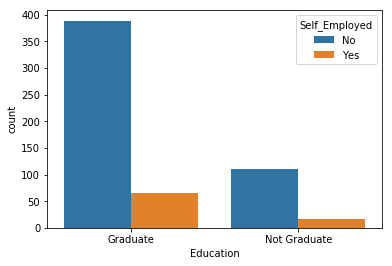

In [60]:
sns.countplot(x="Education",hue="Self_Employed",data=Ddata)

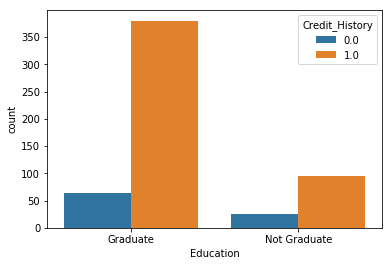

In [61]:
sns.countplot(x="Education",hue="Credit_History",data=Ddata)

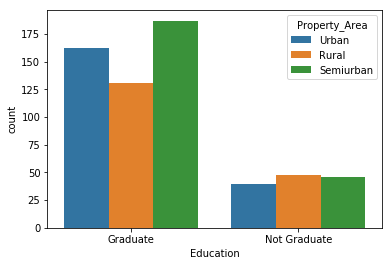

In [62]:
sns.countplot(x="Education",hue="Property_Area",data=Ddata)

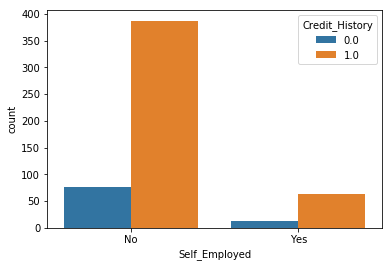

In [63]:
sns.countplot(x="Self_Employed",hue="Credit_History",data=Ddata)

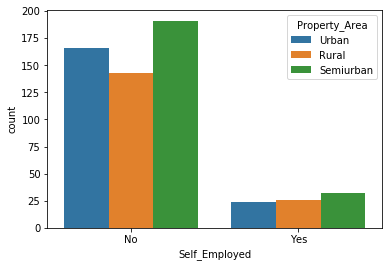

In [64]:
sns.countplot(x="Self_Employed",hue="Property_Area",data=Ddata)

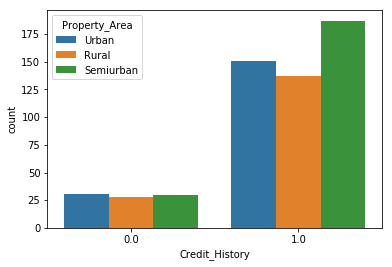

In [65]:
sns.countplot(x="Credit_History",hue="Property_Area",data=Ddata)

## 5. Relationship between Categorical and Continious Variables

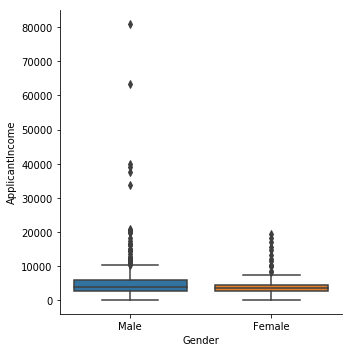

In [72]:
sns.catplot(x="Gender",y="ApplicantIncome",kind="box", data=Ddata)

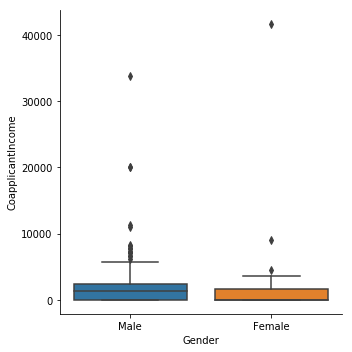

In [73]:
sns.catplot(x="Gender",y="CoapplicantIncome",kind="box", data=Ddata)

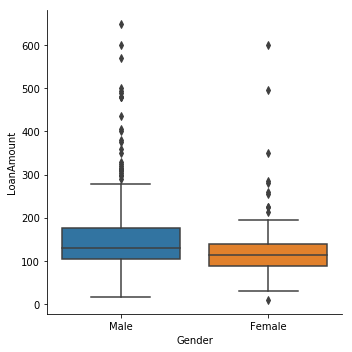

In [75]:
sns.catplot(x="Gender",y="LoanAmount",kind="box", data=Ddata)

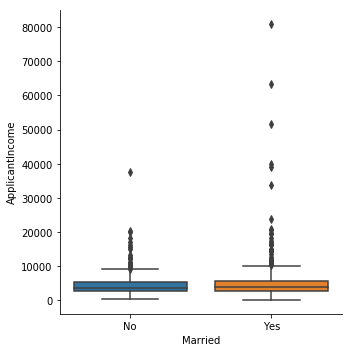

In [78]:
sns.catplot(x="Married",y="ApplicantIncome",kind="box", data=Ddata)

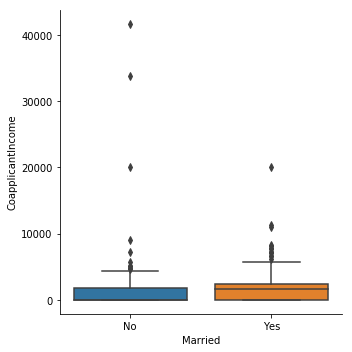

In [79]:
sns.catplot(x="Married",y="CoapplicantIncome",kind="box", data=Ddata)

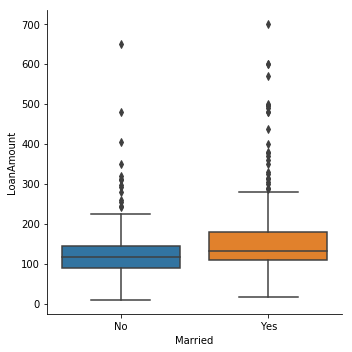

In [80]:
sns.catplot(x="Married",y="LoanAmount",kind="box", data=Ddata)

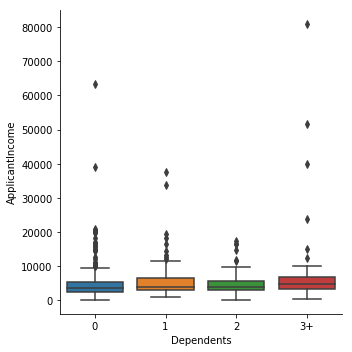

In [83]:
sns.catplot(x="Dependents",y="ApplicantIncome",kind="box", data=Ddata)

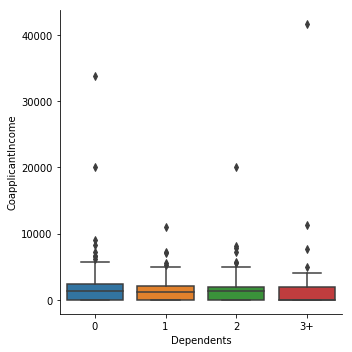

In [84]:
sns.catplot(x="Dependents",y="CoapplicantIncome",kind="box", data=Ddata)

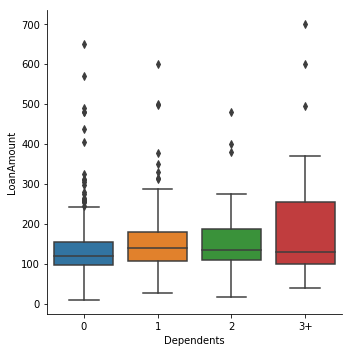

In [85]:
sns.catplot(x="Dependents",y="LoanAmount",kind="box", data=Ddata)

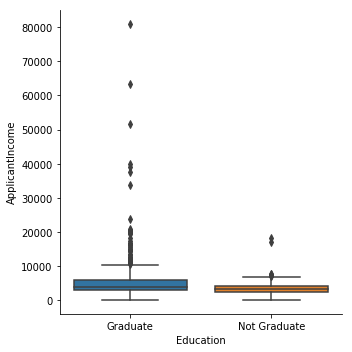

In [87]:
sns.catplot(x="Education",y="ApplicantIncome",kind="box", data=Ddata)

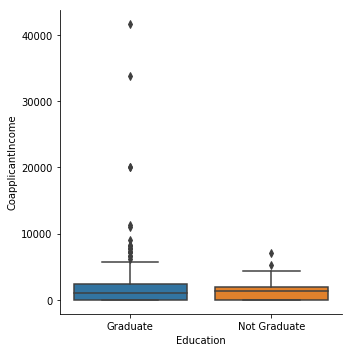

In [89]:
sns.catplot(x="Education",y="CoapplicantIncome",kind="box", data=Ddata)

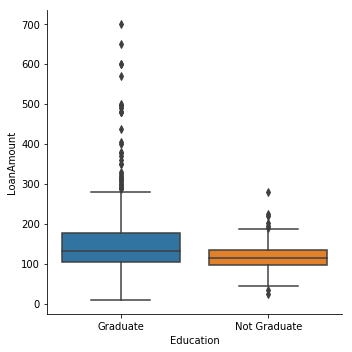

In [90]:
sns.catplot(x="Education",y="LoanAmount",kind="box", data=Ddata)

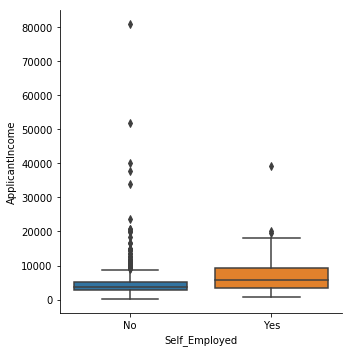

In [92]:
sns.catplot(x="Self_Employed",y="ApplicantIncome",kind="box", data=Ddata)

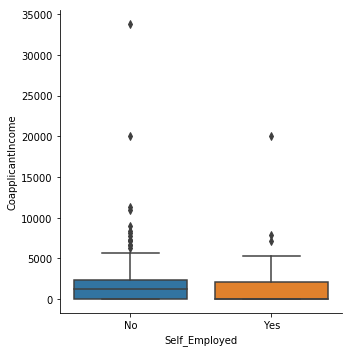

In [93]:
sns.catplot(x="Self_Employed",y="CoapplicantIncome",kind="box", data=Ddata)

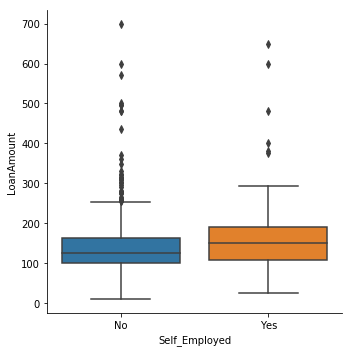

In [94]:
sns.catplot(x="Self_Employed",y="LoanAmount",kind="box", data=Ddata)

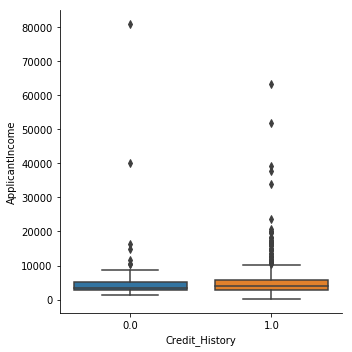

In [103]:
sns.catplot(x="Credit_History",y="ApplicantIncome", kind="box", data=Ddata)

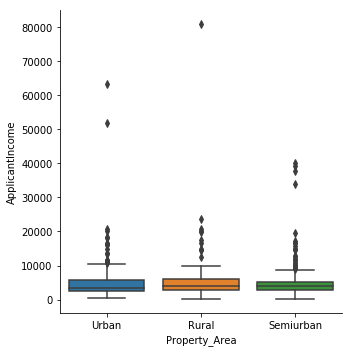

In [104]:
sns.catplot(x="Property_Area",y="ApplicantIncome", kind="box", data=Ddata)

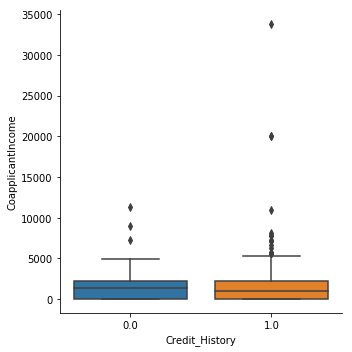

In [105]:
sns.catplot(x="Credit_History",y="CoapplicantIncome", kind="box", data=Ddata)

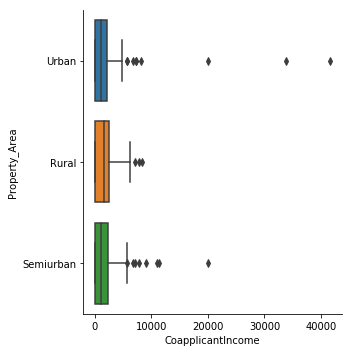

In [107]:
sns.catplot(x="CoapplicantIncome",y="Property_Area", kind="box", data=Ddata)

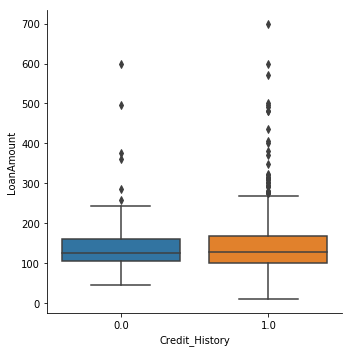

In [108]:
sns.catplot(x="Credit_History",y="LoanAmount", kind="box", data=Ddata)

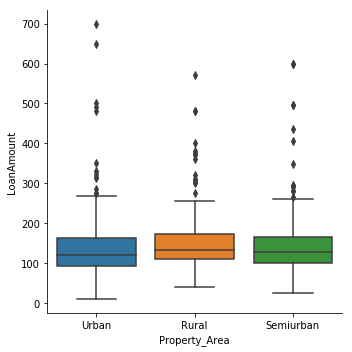

In [109]:
sns.catplot(x="Property_Area",y="LoanAmount", kind="box", data=Ddata)

## Data Wrangling - 1. removing null values

In [22]:
dfstore=df

In [23]:
df.isnull().sum()
#sns.heatmap(df.isnull())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
df.dropna(inplace=True)#Dropped all the null values
df.isnull().sum()
#sns.heatmap(df.isnull())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [25]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


## Data Wrangling - 2. categorical to dummy values 

In [26]:
df2=df

In [27]:
Sex=pd.get_dummies(df2["Gender"], drop_first=True)
Sex.head(3)
Marital=pd.get_dummies(df2["Married"],drop_first=True)
Marital.head(3)
Dep=pd.get_dummies(df2["Dependents"],drop_first=True)
Dep.head(3)
Edu=pd.get_dummies(df2["Education"],drop_first=True)
Edu.head(3)
Self=pd.get_dummies(df2["Self_Employed"],drop_first=True)
Self.head(3)
CreditH=pd.get_dummies(df2["Credit_History"],drop_first=True)
CreditH.head(3)
PA=pd.get_dummies(df2["Property_Area"],drop_first=True)
PA.head(3)

,Semiurban,Urban
1,0,0
2,0,1
3,0,1


In [28]:
df2.drop(['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area'],axis=1,inplace=True)
df2.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
1,4583,1508.0,128.0,360.0,N
2,3000,0.0,66.0,360.0,Y
3,2583,2358.0,120.0,360.0,Y
4,6000,0.0,141.0,360.0,Y
5,5417,4196.0,267.0,360.0,Y


In [29]:
df2=pd.concat([df2,Sex,Marital,Dep,Edu,Self,CreditH,PA],axis=1)
df2.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Male,Yes,1,2,3+,Not Graduate,Yes,1.0,Semiurban,Urban
1,4583,1508.0,128.0,360.0,N,1,1,1,0,0,0,0,1,0,0
2,3000,0.0,66.0,360.0,Y,1,1,0,0,0,0,1,1,0,1
3,2583,2358.0,120.0,360.0,Y,1,1,0,0,0,1,0,1,0,1
4,6000,0.0,141.0,360.0,Y,1,0,0,0,0,0,0,1,0,1
5,5417,4196.0,267.0,360.0,Y,1,1,0,1,0,0,1,1,0,1


In [30]:
df2.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Loan_Status          0
Male                 0
Yes                  0
1                    0
2                    0
3+                   0
Not Graduate         0
Yes                  0
1.0                  0
Semiurban            0
Urban                0
dtype: int64

## Train Data 

In [31]:
df3=df2

In [32]:
y=df3["Loan_Status"]#Dependent Variables
#print (y)

In [33]:
x=df3.drop("Loan_Status",axis=1)#Independent Variables
x.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Male,Yes,1,2,3+,Not Graduate,Yes,1.0,Semiurban,Urban
1,4583,1508.0,128.0,360.0,1,1,1,0,0,0,0,1,0,0
2,3000,0.0,66.0,360.0,1,1,0,0,0,0,1,1,0,1
3,2583,2358.0,120.0,360.0,1,1,0,0,0,1,0,1,0,1
4,6000,0.0,141.0,360.0,1,0,0,0,0,0,0,1,0,1
5,5417,4196.0,267.0,360.0,1,1,0,1,0,0,1,1,0,1


In [34]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()

In [35]:
logmodel.fit(x,y)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Wrangling the test data as it was given separatedly 

In [36]:
datat=pd.read_csv('test_loan.csv')

In [37]:
Ddatat=pd.DataFrame(datat)

In [38]:
DdatatM=Ddatat
DdatatM.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [39]:
dft=DdatatM

In [40]:
dft.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [41]:
dft.dropna(inplace=True)
dft.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [42]:
dft2=dft

In [43]:
Sex=pd.get_dummies(dft2["Gender"], drop_first=True)
Sex.head(3)
Marital=pd.get_dummies(dft2["Married"],drop_first=True)
Marital.head(3)
Dep=pd.get_dummies(dft2["Dependents"],drop_first=True)
Dep.head(3)
Edu=pd.get_dummies(dft2["Education"],drop_first=True)
Edu.head(3)
Self=pd.get_dummies(dft2["Self_Employed"],drop_first=True)
Self.head(3)
CreditH=pd.get_dummies(dft2["Credit_History"],drop_first=True)
CreditH.head(3)
PA=pd.get_dummies(dft2["Property_Area"],drop_first=True)
PA.head(3)

,Semiurban,Urban
0,0,1
1,0,1
2,0,1


In [44]:
dft2.drop(['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area'],axis=1,inplace=True)
dft2.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5720,0,110.0,360.0
1,3076,1500,126.0,360.0
2,5000,1800,208.0,360.0
4,3276,0,78.0,360.0
5,2165,3422,152.0,360.0


In [45]:
dft2=pd.concat([dft2,Sex,Marital,Dep,Edu,Self,CreditH,PA],axis=1)
dft2.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Male,Yes,1,2,3+,Not Graduate,Yes,1.0,Semiurban,Urban
0,5720,0,110.0,360.0,1,1,0,0,0,0,0,1,0,1
1,3076,1500,126.0,360.0,1,1,1,0,0,0,0,1,0,1
2,5000,1800,208.0,360.0,1,1,0,1,0,0,0,1,0,1
4,3276,0,78.0,360.0,1,0,0,0,0,1,0,1,0,1
5,2165,3422,152.0,360.0,1,1,0,0,0,1,1,1,0,1


In [46]:
dft3=dft2#for saftey sake
dft.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5720,0,110.0,360.0
1,3076,1500,126.0,360.0
2,5000,1800,208.0,360.0
4,3276,0,78.0,360.0
5,2165,3422,152.0,360.0


## Wrangling Done 

## Predicting Loan_Status based on Traindata=>df3 & Testdata=>dft3

In [47]:
predictions=logmodel.predict(dft2)
pred=pd.DataFrame(predictions)
pred.columns=["Value"]
pred.head()

,Value
0,Y
1,Y
2,Y
3,Y
4,Y


In [48]:
pred.count()

Value    289
dtype: int64

In [49]:
dft2.count()

ApplicantIncome      289
CoapplicantIncome    289
LoanAmount           289
Loan_Amount_Term     289
Male                 289
Yes                  289
1                    289
2                    289
3+                   289
Not Graduate         289
Yes                  289
1.0                  289
Semiurban            289
Urban                289
dtype: int64

In [50]:
import pandas as pd
datat2=pd.read_csv('test_loan.csv')
dfloan_id=pd.DataFrame(datat2)

In [51]:
dfloan_id.count()

Loan_ID              367
Gender               356
Married              367
Dependents           357
Education            367
Self_Employed        344
ApplicantIncome      367
CoapplicantIncome    367
LoanAmount           362
Loan_Amount_Term     361
Credit_History       338
Property_Area        367
dtype: int64

In [52]:
dfloan_id.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [53]:
dfloan_id.dropna(inplace=True)

In [54]:
dfloan_id.count()

Loan_ID              289
Gender               289
Married              289
Dependents           289
Education            289
Self_Employed        289
ApplicantIncome      289
CoapplicantIncome    289
LoanAmount           289
Loan_Amount_Term     289
Credit_History       289
Property_Area        289
dtype: int64

In [55]:
dfloan_id.head(500)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban
10,LP001078,Male,No,0,Not Graduate,No,3091,0,90.0,360.0,1.0,Urban
14,LP001096,Female,No,0,Graduate,No,4666,0,124.0,360.0,1.0,Semiurban


# ReIndexing dfloan_id with the index of pred

In [60]:
list1=dfloan_id['Loan_ID']
list2=pred['Value']
finalanswer={'Loan_ID':list1,'Predicted Value':list2}
fa=pd.DataFrame(finalanswer)

In [62]:
fa.to_csv('finalanswer.csv',index=False)